# SYD DAT 4 Project : Hospital Readmissions prediction

### Overview 

I had an opportunity to work as a software engineer at Vanderbilt University Medical Center,US where I was involved in biomedical research projects. It is very gratifying as a computer science person to help solve interesting and challenging health care problems, which is why I choose this project.

Hospital readmission means when a patient is re-admitted to a hospital within short period(usually 28/30 days)after first time or initial discharge. Such readmissions are major health care concern for most countries like US, UK, Australia and many others. This leads to increased wait times, increased medical errors resulting in risking patient safety and unncessary deaths. High readmission rate is infact an indicator of poor quality care of the hospital. It also puts huge monetary burden on the hospitals as well as the government. In this project, I want to identify patients who are likely to be readmitted to the hospital. By doing this, proper care and management of such patients can be planned by their care providers.

### Goal(s) : 
Predict if a patient will be readmitted to the hospital or not?

### Data set used : 

In order to achieve the above goal(s), I need a hospital data set that has records of all hospitalizations entries for its patients for certain number of years. It should contain information like why the patients were admitted, which department they were admitted for, how many times they were admitted, what medications they were on, what lab tests were conducted, how many days they stayed in hospital, vitals signs like heights/weights, age, race, blood pressure, smoking status, their electronic medical records, billing records, genetics data, etc.

Of course, it's hard to obtain such a heterogeneous dataset which is publicly available as patient data are very confidential. Though there are quite a few data sets that contain substantial information and after going through some of them, I decided to use "Diabetes 130-US hospitals for years 1999-2008 Data Set".

This is a public available database by Center for Clinical and Translational Research, Virginia Commonwealth University. This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO). It contains 10 years of diabetes patients data across 130 US hospitals.

http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

### Summary of data : 

From the below python code, following observations are made :-
 * There are 50 features and 101766 observations(hospitalizations). 
 
 
 * Each row in dataframe represents one hospital admission. On an average, there are 5 hospitalizations for each patient (patient_nbr is the de-identifed patient ID).
 
 
 * In the dataset, "readmitted" is the target varible with three classes :
 
 NO means never readmitted (~54% of total dataset)
 
 &lt;30 means readmitted within 30 days (~11% of total dataset)
 
 &gt;30 means readmitted after 30 days (~35% of total dataset)


 * To start with a simple binary classification model, I am grouping &lt;30 and &gt;30 classes of readmitted target varible into one class "1", which means the patient is readmitted anytime. And class NO is "0" means patient is never readmitted. Also this gives even distribution between binary classes. 
 
 
 * Several patients have multiple hospitalizations, so I have used only the first admission and predict whether they will be re-admitted or not. This gives 71518 unique patient hospitalizations.
 
 
 * Numeric features are : time_in_hospital, num_medications,num_lab_procedures, num_procedures, number_outpatient, number_inpatient, number_diagnoses. 


 * The average amount of time spent(time_in_hospital) in a hospital is 4 days and there is a good variation in this feature ranging from 1 day to 14 days.
 
 
 * Number of lab procedures conducted during the stay is on an average 43, and it ranges from 1 to 132.
 
 
 * The average number of medications administered is 16 with minimum 1 and maximum of 81 medications.
 
 
 * Many features have non-numeric values, e.g.: race, gender, age is in range, medications like citoglipton, insulin, diag_1, diag_2, diag_3, etc,. So need to transform them.
 
 
 * Weight feature has 97% data missing, so I will not include it. I am not sure if it makes sense to impute such large missing data. May be better off by excluding that feature for the time being.
 

### Modelling techniques : 

* As of now I have used only numeric features for classification and used logistic regression, regularized logistic regression and decision trees methods. 


* My next step is to transform non-numeric features into categorical(nominal) values and add them into the models. Some them I think are crucial.


* Try out other models like KNN classfication, random forests, SVM, etc.


* Question : Several non-numeric features have more than 3 categories. Does it make sense to binarize them all to be used in classic logistic regression? Or better off using models that would accept categorical features without binarizing them?

### Visualizations : 

Although the main goal of the project is to use a modelling technique to predict patient readmission, but if time permits I would to like make some dashboard so that hospitals or clinicians can use to visualize data for their patients.








In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [2]:
# read diabetic_data.csv into a DataFrame called 'hospital_set'
hospital_set = pd.read_table('dataset_diabetes/diabetic_data.csv', sep=',')

In [3]:
hospital_set.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# examine the default index, data types, and shape
#hospital_set.index
#hospital_set.dtypes
hospital_set.shape
 

(101766, 50)

In [5]:
hospital_set.describe() 

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
# Here "readmitted" is the target variable
hospital_set.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [7]:
# Transforming the "readmitted" variable into binary outcome. 
# NO = 0 (patients are not readmitted, it could be their first/initial admission)
# >30 = 0 (patients admitted after 30 days are not called readmitted)
# < 30 = 1 (patients admitted within 30 days are called readmitted)
hospital_set['readmitted'] = hospital_set['readmitted'].map({ "<30" : 1, ">30" : 1,"NO" : 0})
hospital_set.readmitted.value_counts()



0    54864
1    46902
Name: readmitted, dtype: int64

In [8]:
# TRANSFORMATIONS FOR CATEGORICAL VALUES : TBD


In [9]:
# Here many patients have multiple encounter ids (hospitalizations). 
# For predictions, I will just take the first encounter id as first admission and 
# predict whether the patient will be readmitted next time or not withing 30 days window.

# Here I use group by function to group by the hospital_set for each patient 
# and then take minimum value for encounter id to get first admission for each patient.
hospital_subset = hospital_set.loc[hospital_set.groupby("patient_nbr")["encounter_id"].idxmin()]


In [10]:
hospital_subset.shape
#hospital_subset.head()
#hospital_subset.readmitted.value_counts()

(71518, 50)

In [11]:
# Look for any linear correlations in the data
hospital_subset.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id,1.000000,0.502034,-0.150258,-0.136536,-0.113674,-0.069457,-0.051946,-0.005310,0.056166,0.070958,0.051455,-0.041483,0.256566,-0.102402
patient_nbr,0.502034,1.000000,-0.010712,-0.136942,-0.019440,-0.017976,0.008597,-0.022938,0.015527,0.087480,0.056340,0.093525,0.228945,0.066821
admission_type_id,-0.150258,-0.010712,1.000000,0.088565,0.121644,-0.017477,-0.117187,0.132050,0.095376,0.038149,-0.017267,0.039090,-0.116886,0.020227
discharge_disposition_id,-0.136536,-0.136942,0.088565,1.000000,0.005202,0.163874,0.028224,0.021512,0.114623,-0.016582,-0.026477,-0.021484,0.048314,-0.008771
admission_source_id,-0.113674,-0.019440,0.121644,0.005202,1.000000,0.007097,0.089209,-0.127122,-0.058141,0.018547,0.056719,0.030090,0.066753,0.044072
time_in_hospital,-0.069457,-0.017976,-0.017477,0.163874,0.007097,1.000000,0.330146,0.188911,0.469426,-0.014984,-0.009805,0.063736,0.233338,0.059063
num_lab_procedures,-0.051946,0.008597,-0.117187,0.028224,0.089209,0.330146,1.000000,0.050072,0.261911,-0.006933,0.014091,0.080162,0.157574,0.045907
num_procedures,-0.005310,-0.022938,0.132050,0.021512,-0.127122,0.188911,0.050072,1.000000,0.403738,-0.018347,-0.035178,-0.023977,0.089153,-0.028032
num_medications,0.056166,0.015527,0.095376,0.114623,-0.058141,0.469426,0.261911,0.403738,1.000000,0.026183,0.002400,0.037487,0.259201,0.034145
number_outpatient,0.070958,0.087480,0.038149,-0.016582,0.018547,-0.014984,-0.006933,-0.018347,0.026183,1.000000,0.095002,0.068591,0.076612,0.064023


In [63]:
#hospital_subset['diabetesMed_Yes'] = hospital_subset.diabetesMed.map({'Yes':1, 'No':0})

#hospital_subset['Age_new'] = hospital_subset.age.map({'[0-10)':0, '[10-20)':1,'[20-30)':2,'[30-40)':4,'[40-50)':5,
 #                                                             '[50-60)':6,'[60-70)':7,'[70-80)':8,'[80-90)':9,'[90-100)':10})

#hospital_subset['A1Cresult_new'] = hospital_subset.A1Cresult.map({'None':0, '>7':1,'Norm':2,'>8':4 })
#hospital_subset['change_Yes'] = hospital_subset.diabetesMed.map({'Ch':1, 'No':0})
#hospital_subset['metformin_new'] = hospital_subset.metformin.map({'None':0, 'Steady':1,'Up':2,'Down':4 })
hospital_subset['insulin_new'] = hospital_subset.insulin.map({'None':0, 'Steady':1,'Up':2,'Down':4 })


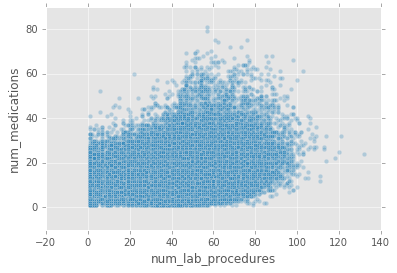

In [92]:
# scatterplot of time_in_hospital versus num_medications
#hospital_subset.plot(kind='scatter', x='time_in_hospital', y='num_medications', alpha=0.3)
#hospital_subset.plot(kind='scatter', x='num_medications', y='time_in_hospital', alpha=0.3)
#hospital_subset.plot(kind='scatter', x='num_medications', y='num_lab_procedures', alpha=0.3)
hospital_subset.plot(kind='scatter', x='num_lab_procedures', y='num_medications', alpha=0.3)

plt.xlabel('num_lab_procedures')
plt.ylabel('num_medications')
#plt.show()                                  # show plot window (if it doesn't automatically appear)
plt.savefig('lab_meds_scatter.png')

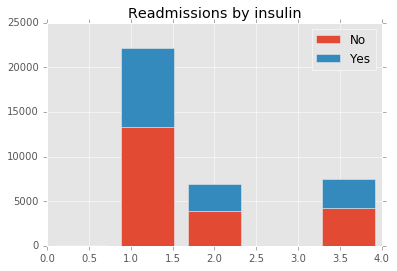

In [65]:
family_sizes = sorted(hospital_subset['insulin_new'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['insulin_new']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['insulin_new']
plt.hist([df1, df2], 
         bins=family_size_max+1, 
         #bins=5,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by insulin')

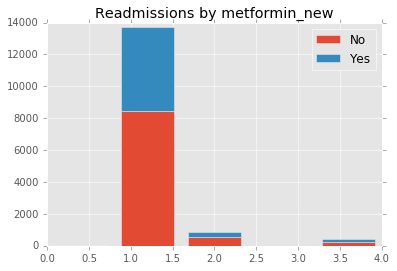

In [60]:
family_sizes = sorted(hospital_subset['metformin_new'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['metformin_new']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['metformin_new']
plt.hist([df1, df2], 
         bins=family_size_max+1, 
         #bins=5,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by metformin_new')

ValueError: cannot convert float NaN to integer

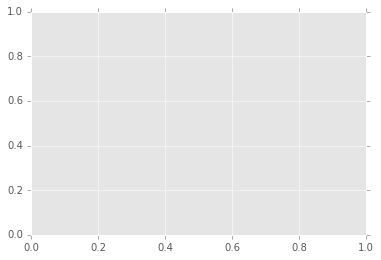

In [58]:
family_sizes = sorted(hospital_subset['change_Yes'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['change_Yes']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['change_Yes']
plt.hist([df1, df2], 
         bins=family_size_max+1, 
         #bins=5,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by change_Yes')

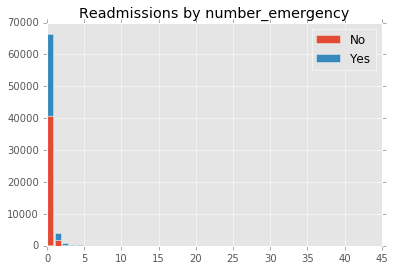

In [54]:
family_sizes = sorted(hospital_subset['number_emergency'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['number_emergency']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['number_emergency']
plt.hist([df1, df2], 
         bins=family_size_max+1, 
         #bins=5,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by number_emergency')

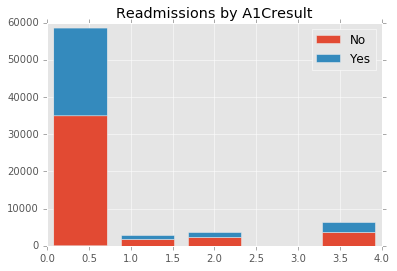

In [53]:
family_sizes = sorted(hospital_subset['A1Cresult_new'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['A1Cresult_new']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['A1Cresult_new']
plt.hist([df1, df2], 
         bins=family_size_max+1, 
         #bins=5,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by A1Cresult')

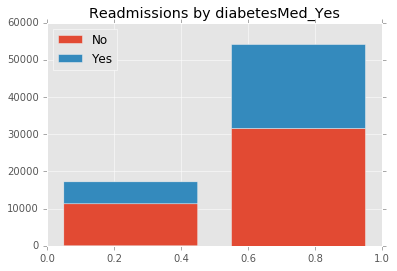

In [50]:
family_sizes = sorted(hospital_subset['diabetesMed_Yes'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['diabetesMed_Yes']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['diabetesMed_Yes']
plt.hist([df1, df2], 
         bins=family_size_max+1, 
         #bins=5,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by diabetesMed_Yes')

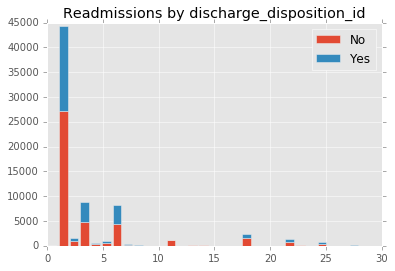

In [43]:
family_sizes = sorted(hospital_subset['discharge_disposition_id'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['discharge_disposition_id']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['discharge_disposition_id']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         #bins=5,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by discharge_disposition_id')

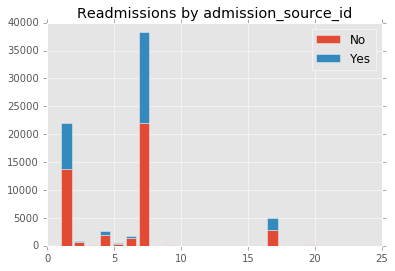

In [44]:
family_sizes = sorted(hospital_subset['admission_source_id'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['admission_source_id']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['admission_source_id']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         #bins=6,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by admission_source_id')

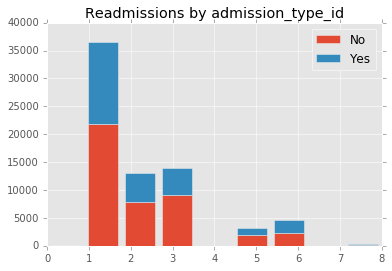

In [39]:
family_sizes = sorted(hospital_subset['admission_type_id'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['admission_type_id']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['admission_type_id']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         #bins=6,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by admission_type_id')

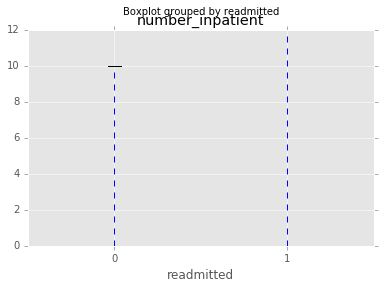

In [38]:
hospital_subset.boxplot(column='number_inpatient', by='readmitted')

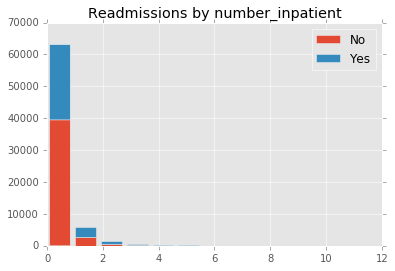

In [37]:
family_sizes = sorted(hospital_subset['number_inpatient'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['number_inpatient']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['number_inpatient']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         #bins=6,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by number_inpatient')

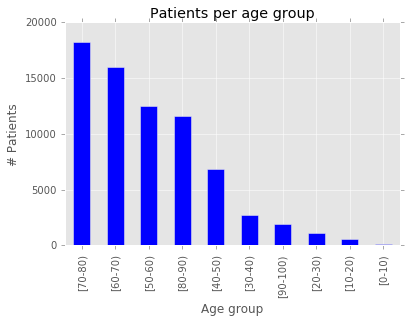

In [75]:
#hospital_subset['age'].hist()
#plt.title('age')

hospital_subset.age.value_counts().plot(kind='bar', title='Patients per age group')
plt.xlabel('Age group')
plt.ylabel('# Patients')
#plt.show()                                  # show plot window (if it doesn't automatically appear)
plt.savefig('patinets_per_age.png')
#names = ['[0-10)', '[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)']
#set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")

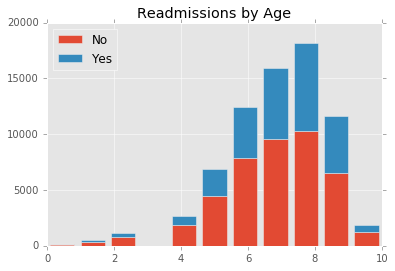

In [33]:
family_sizes = sorted(hospital_subset['Age_new'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['Age_new']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['Age_new']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         #bins=6,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by Age')

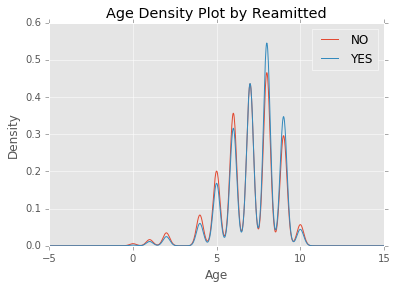

In [67]:
readmitted_classes = sorted(hospital_subset['readmitted'].unique())
for pclass in readmitted_classes:
    hospital_subset.Age_new[hospital_subset.readmitted == pclass].plot(kind='kde')
plt.title('Age Density Plot by Reamitted')
plt.xlabel('Age')
plt.legend(('NO', 'YES'), loc='best')


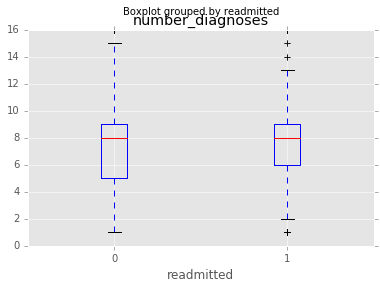

In [26]:
#hospital_subset['number_diagnoses'].hist()
hospital_subset.boxplot(column='number_diagnoses', by='readmitted')

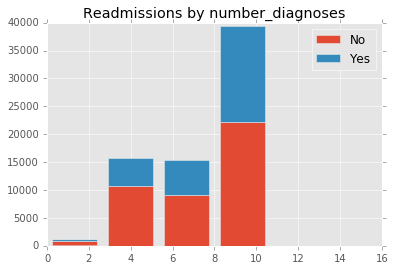

In [27]:
family_sizes = sorted(hospital_subset['number_diagnoses'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['number_diagnoses']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['number_diagnoses']
plt.hist([df1, df2], 
         #bins=family_size_max + 1, 
         bins=6,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by number_diagnoses')

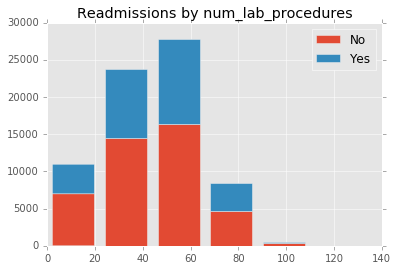

In [77]:
family_sizes = sorted(hospital_subset['num_lab_procedures'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['num_lab_procedures']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['num_lab_procedures']
plt.hist([df1, df2], 
         #bins=family_size_max + 1, 
         bins=6,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by num_lab_procedures')
plt.savefig('num_lab_procedures.png')

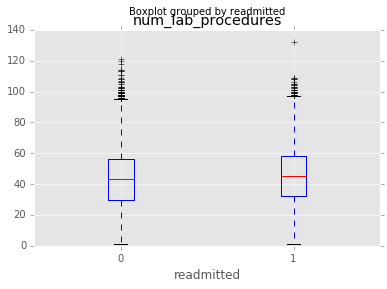

In [24]:
hospital_subset.boxplot(column='num_lab_procedures', by='readmitted')

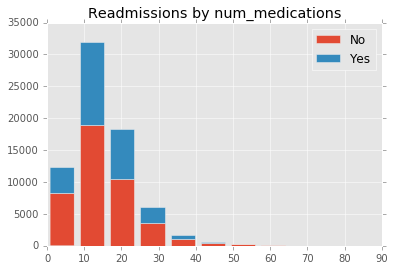

In [22]:
family_sizes = sorted(hospital_subset['num_medications'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['num_medications']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['num_medications']
plt.hist([df1, df2], 
         #bins=family_size_max + 1,
         bins=10,
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by num_medications')

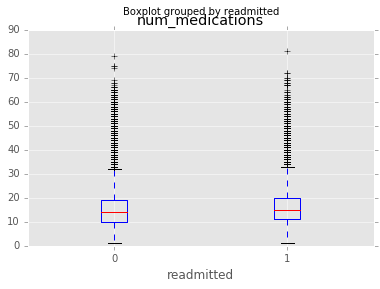

In [23]:
# boxplot of beer servings by continent (shows five-number summary and outliers)
hospital_subset.boxplot(column='num_medications', by='readmitted')

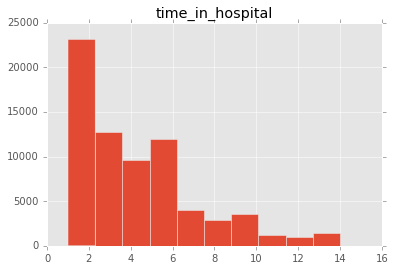

In [12]:
hospital_subset['time_in_hospital'].hist()
plt.title('time_in_hospital')

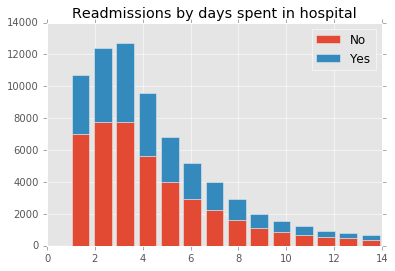

In [16]:
family_sizes = sorted(hospital_subset['time_in_hospital'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['time_in_hospital']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['time_in_hospital']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by days spent in hospital')

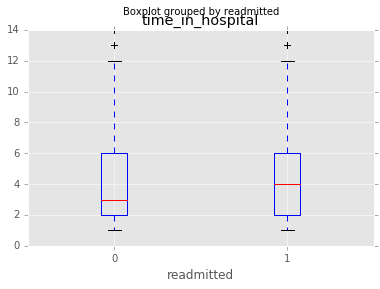

In [25]:
hospital_subset.boxplot(column='time_in_hospital', by='readmitted')

In [61]:
# Mapping ICD9(disease codes) to numeric values. Here I group codes by disease type.

from collections import Counter

Circulatory_map =  Counter({})
for i in range(390,460):
    Circulatory_map.update({str(i): 1})
Circulatory_map.update({'785': 1})

Respiratory_map =  Counter({})
for i in range(460,520):
    Respiratory_map.update({str(i): 2})
Respiratory_map.update({'786': 2})

Digestive_map =  Counter({})
for i in range(520,580):
    Digestive_map.update({str(i): 3})
Digestive_map.update({'787': 3})  

diabetes_map = Counter({'250': 4, '250.01':4,'250.02':4,'250.03':4,'250.1':4,'250.11':4,'250.12':4,'250.13':4,
            '250.2':4,'250.21':4,'250.22':4,'250.23':4,'250.3':4,'250.31':4,'250.32':4,'250.33':4,
            '250.4':4,'250.41':4,'250.42':4,'250.43':4,'250.5':4,'250.51':4,'250.52':4,'250.53':4,
            '250.6':4,'250.7':4,'250.8':4,'250.81':4,'250.82':4,'250.83':4,
            '250.9':4,'250.91':4,'250.92':4,'250.93':4})

Injury_map =  Counter({})
for i in range(800,1000):
    Injury_map.update({str(i): 5})


Musculoskeletal_map =  Counter({})
for i in range(710,740):
    Musculoskeletal_map.update({str(i): 6})
                           
Genitourinary_map =  Counter({})
for i in range(580,630):
    Genitourinary_map.update({str(i): 7})
Genitourinary_map.update({'788': 7})

Neoplasms_map =  Counter({})
for i in range(140,240):
    Neoplasms_map.update({str(i): 8})
                     
Others_map =  Counter({})
for i in range(240,250):
    Others_map.update({str(i): 9})
for i in range(251,280):
    Others_map.update({str(i): 9})
for i in range(680,710):
    Others_map.update({str(i): 9})
for i in range(001,140):
    Others_map.update({str(i): 9})
for i in range(291,320):
    Others_map.update({str(i): 9}) 
for i in range(281,290):
    Others_map.update({str(i): 9})
for i in range(320,360):
    Others_map.update({str(i): 9})
for i in range(630,680):
    Others_map.update({str(i): 9})
for i in range(360,390):
    Others_map.update({str(i): 9})
for i in range(740,760):
    Others_map.update({str(i): 9})
Others_map.update({'782': 9})    

other_disease1_map =  Counter({'E909': 9,'V07': 9,'V25': 9,'V26': 9,'V43': 9,
            'V45': 9,'V51': 9,'V53': 9,'V54': 9,'V55': 9,
            'V56': 9,'V57': 9,'V57': 9,'V58': 9,'V60': 9,
            'V63': 9,'V66': 9,'V67': 9,'V63': 9,'V70': 9,'V71': 9}) 

All_disease_map = diabetes_map + other_disease1_map + Circulatory_map + Respiratory_map + Digestive_map + Injury_map + Musculoskeletal_map + Genitourinary_map + Neoplasms_map + Others_map

#All_disease_map
hospital_subset['diag_1_map'] = hospital_subset['diag_1'].map(All_disease_map)
hospital_subset['diag_1_map'].head()
hospital_subset['diag_1_map'].value_counts()

1    21894
9     9919
2     9776
3     6570
4     5805
5     4779
6     4080
7     3514
8     2742
Name: diag_1_map, dtype: int64

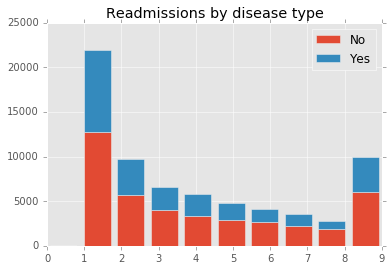

In [62]:
family_sizes = sorted(hospital_subset['diag_1_map'].unique())
family_size_max = max(family_sizes)

df1 = hospital_subset[hospital_subset['readmitted'] == 0]['diag_1_map']
df2 = hospital_subset[hospital_subset['readmitted'] == 1]['diag_1_map']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Readmissions by disease type')

In [11]:
# use numeric features to apply logistic regression

feature_cols = ['time_in_hospital', 'num_medications','num_lab_procedures','num_procedures','number_outpatient','number_inpatient','number_diagnoses']

X = hospital_subset[feature_cols]
y = hospital_subset.readmitted

In [12]:
# Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('time_in_hospital', 0.0275727750890533),
 ('num_medications', -0.00031476023722607686),
 ('num_lab_procedures', 0.0018493762229741049),
 ('num_procedures', -0.046840999789455162),
 ('number_outpatient', 0.095940174892903407),
 ('number_inpatient', 0.47750542496554943),
 ('number_diagnoses', 0.086850672810349888)]

In [80]:
# Make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
#print metrics.accuracy_score(y_test, y_pred_class)
print 'Accuracy (Simple logistic regression) =', metrics.accuracy_score(y_test, y_pred_class)

# Calculate the AUC metric
#metrics.roc_auc_score(y_test, y_pred_class)
print "ROC(Simple logistic regression) = ",metrics.roc_auc_score(y_test, y_pred_class)

Accuracy (Simple logistic regression) = 0.622483221477
ROC(Simple logistic regression) =  0.543076018942


In [17]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[10046,   710],
       [ 6040,  1084]])

In [22]:
# calculate the sensitivity
1084 / float(1084 + 6040)

0.15216170690623246

In [23]:
# calculate the specificity
10046 / float(10046 + 710)

0.9339903309780587

In [19]:
from sklearn.metrics import classification_report
target_names = ['Readmission_NO', 'Readmission_YES']
print(classification_report(y_test, y_pred_class, target_names=target_names))

                 precision    recall  f1-score   support

 Readmission_NO       0.62      0.93      0.75     10756
Readmission_YES       0.60      0.15      0.24      7124

    avg / total       0.62      0.62      0.55     17880



In [24]:
# LOGISTIC REGRESSION CROSS VALIDAION 
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=100)
print scores
print scores.mean()

[ 0.61173184  0.61592179  0.60614525  0.60335196  0.61871508  0.68296089
  0.60195531  0.6103352   0.62150838  0.61871508  0.61452514  0.61173184
  0.61731844  0.61312849  0.62988827  0.6103352   0.61871508  0.63128492
  0.64664804  0.62150838  0.62011173  0.61592179  0.6075419   0.6103352
  0.6075419   0.59776536  0.6047486   0.63268156  0.62849162  0.6075419
  0.63128492  0.6452514   0.62430168  0.63356643  0.63636364  0.63076923
  0.62237762  0.6013986   0.62517483  0.5972028   0.6         0.61118881
  0.61958042  0.63076923  0.62657343  0.62517483  0.63776224  0.64615385
  0.65734266  0.63496503  0.61818182  0.61398601  0.64615385  0.65454545
  0.60979021  0.62517483  0.61258741  0.62237762  0.64615385  0.65454545
  0.69230769  0.68671329  0.63356643  0.63916084  0.66293706  0.65594406
  0.66293706  0.6         0.56643357  0.57062937  0.56083916  0.55664336
  0.6         0.61678322  0.57902098  0.59020979  0.58461538  0.6041958
  0.6027972   0.6027972   0.60839161  0.5972028   0.59

In [65]:
########## Logistic Regression With L1 Penalty ##########
# logistic regression with L1 penalty (C must be positive, smaller means more regularization)
logreg_l1 = LogisticRegression(C=0.1, penalty='l1')
logreg_l1.fit(X_train, y_train)
logreg_l1.coef_
y_pred_l1 = logreg_l1.predict(X_test)

# Access accuracy
print 'Accuracy (L1 penalty) =', metrics.accuracy_score(y_test, y_pred_l1)
print "ROC(L1 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l1)

Accuracy (L1 penalty) = 0.6225950783
ROC(L1 penalty) =  0.543121591093


In [66]:
########## Logistic Regression With L2 Penalty ##########
# logistic regression with L2 penalty (C must be positive, smaller means more regularization)
logreg_l2 = LogisticRegression(C=0.1, penalty='l2')
logreg_l2.fit(X_train, y_train)
logreg_l2.coef_
y_pred_l2 = logreg_l2.predict(X_test)

# Access accuracy
print 'Accuracy (L2 penalty) =', metrics.accuracy_score(y_test, y_pred_l2)
print "ROC(L2 penalty) = ",metrics.roc_auc_score(y_test, y_pred_l2)

Accuracy (L2 penalty) = 0.6225950783
ROC(L2 penalty) =  0.543168990307


In [78]:
# Decision trees
from sklearn import tree

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=6)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)

# Which features are the most important?
ctree.feature_importances_

# Make predictions on the test set
preds = ctree.predict(X_test)

# Calculate accuracy
metrics.accuracy_score(y_test, preds)
print 'Accuracy (Descision tree) =', metrics.accuracy_score(y_test, preds)

# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)[:,1]

# Calculate the AUC metric
print "ROC(Descision tree) = ",metrics.roc_auc_score(y_test, preds)

Accuracy (Descision tree) = 0.624776286353
ROC(Descision tree) =  0.557282027826


In [77]:
'''

FINE-TUNING THE TREE

'''
from sklearn.grid_search import GridSearchCV


# check CV score for max depth = 6
ctree = tree.DecisionTreeClassifier(max_depth=6)
np.mean(cross_val_score(ctree, X, y, cv=5, scoring='roc_auc'))

# check CV score for max depth = 10
#tree = tree.DecisionTreeClassifier(max_depth=10)
#np.mean(cross_val_score(ctree, X, y, cv=5, scoring='roc_auc'))


0.59924989740840706